In [4]:
import json
import pandas as pd 

In [5]:
with open('D:/work_dir/Datasets/LoRa_anomaly-detection/range_based_positioning/results/pl_model_okumura_hata/2024-12-16_16-49/result.json', 'r') as file:
    r = json.load(file)

In [6]:
r2 = pd.read_json('D:/work_dir/Datasets/LoRa_anomaly-detection/range_based_positioning/results/pl_model_okumura_hata/2024-12-16_16-49/result.json')

<Axes: ylabel='Estimation Error'>

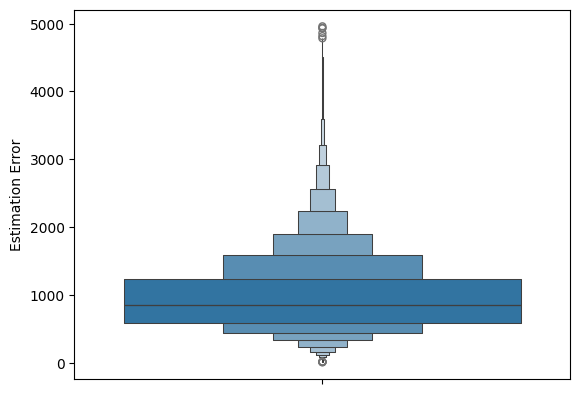

In [35]:
import seaborn as sns

est_errors = r2['Estimation Error'].dropna()

sns.boxenplot(est_errors[est_errors < 5000])

In [22]:
print('Estimation error')
print(f'        Mean: {est_errors.mean()}')
print(f'      Median: {est_errors.median()}')
print(f'         Max: {est_errors.max()}')


Estimation error
        Mean: 53695.87766598984
      Median: 1062.0985760224098
         Max: 952166.161713223


In [20]:
r2['Estimation Error'].dropna()

0           638.086134
1          1203.774963
2           326.657589
3        138385.208116
4           700.286566
             ...      
55371    455114.845942
55372    148526.811618
55373       742.780599
55374      1355.373392
55375      1112.914194
Name: Estimation Error, Length: 55074, dtype: float64

In [19]:
r2['Estimation Error']


0           638.086134
1          1203.774963
2           326.657589
3        138385.208116
4           700.286566
             ...      
55371    455114.845942
55372    148526.811618
55373       742.780599
55374      1355.373392
55375      1112.914194
Name: Estimation Error, Length: 55376, dtype: float64

In [36]:
est_er = est_errors[est_errors < 5000]
print('Estimation error')
print(f'        Mean: {est_er.mean()}')
print(f'      Median: {est_er.median()}')
print(f'         Max: {est_er.max()}')

Estimation error
        Mean: 966.2504114489584
      Median: 844.7690629344104
         Max: 4958.9285585737325
